In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
# load data với dữ liệu thô
df = pd.read_csv("raw_depression_dataset.csv", index_col=0)

/tmp/ipykernel_2216/755186256.py:2: DtypeWarning: Columns (7,8,9,10,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("raw_depression_dataset.csv", index_col=0)


Baseline: Xử lý data 1 cách cơ bản, làm sạch 1 số cột số chứa mixed data, và fill missing  = 0

In [3]:
# 1. Drop irrelevant columns
df_clean = df.drop(columns=['Name'])

# 2. Clean Numeric Columns with Mixed Data
numeric_cols = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
for col in numeric_cols:
    # coerce errors turns 'Error', '??', 'High' etc into NaN
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 3. Drop Duplicates (always good for preliminary cleaning)
df_clean = df_clean.drop_duplicates()


In [4]:
df_baseline = df_clean.select_dtypes(include=['number']).fillna(0)

In [5]:
X = df_baseline.drop('Depression', axis=1)
y = df_baseline['Depression']

In [6]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RANDOM_STATE)

In [7]:
model = LogisticRegression()

In [1]:
model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [14]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     31235
           1       0.80      0.51      0.62      6906

    accuracy                           0.89     38141
   macro avg       0.85      0.74      0.78     38141
weighted avg       0.88      0.89      0.88     38141



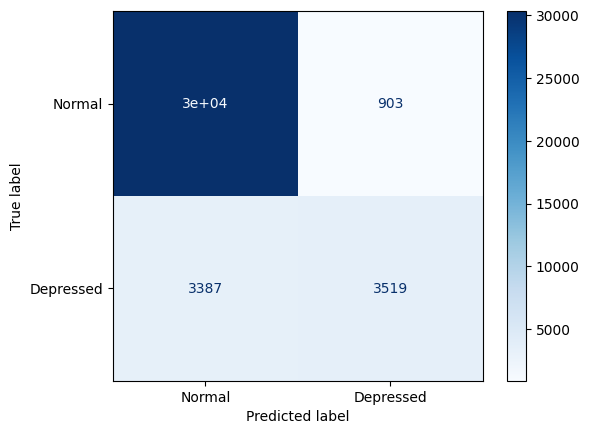

In [59]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))

# Vẽ ma trận
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Normal", "Depressed"], cmap="Blues")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6527928-bbf4-4c9a-8760-1f30ce0e5ba3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>